In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv("E:\Python\ML_PROJECTS\Machine_Learning_Projects\Banking_Marketing_Targets\\train.csv",sep=';')
df_test=pd.read_csv("E:\Python\ML_PROJECTS\Machine_Learning_Projects\Banking_Marketing_Targets\\test.csv",sep=';')

In [3]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Exploratory Data Analysis

In [5]:
df_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 0, 'Subscribed Yes/No')

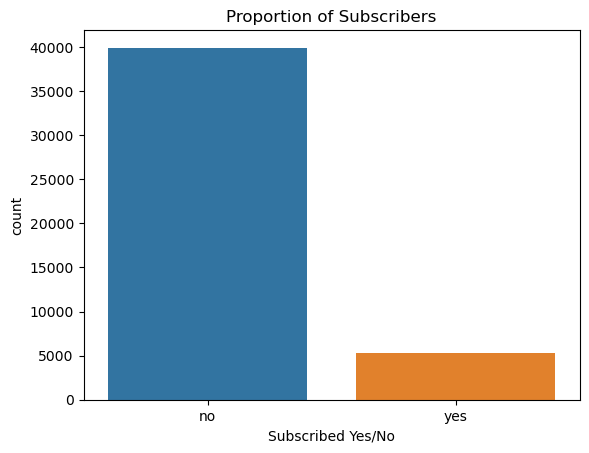

In [6]:
sns.countplot(df_train['y'])
plt.title('Proportion of Subscribers')
plt.xlabel('Subscribed Yes/No')

Hence its a hevaily imbalanced dataset

Text(0.5, 0, 'Subscribed Yes/No')

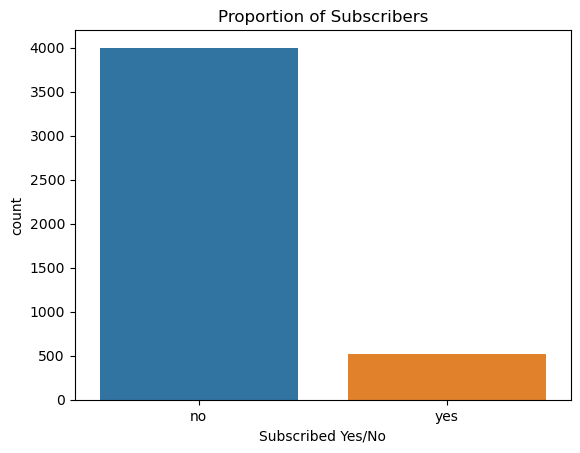

In [7]:
sns.countplot(df_test['y'])
plt.title('Proportion of Subscribers')
plt.xlabel('Subscribed Yes/No')

In [8]:
df_test.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
df_train.rename(columns={'y':'Subscribed'},inplace=True)

In [12]:
df_train['Subscribed']=df_train['Subscribed'].map({'yes':1,'no':0})

In [13]:
df_test.rename(columns={'y':'Subscribed'},inplace=True)
df_test['Subscribed']=df_test['Subscribed'].map({'yes':1,'no':0})

In [14]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


In [15]:
df_train.corr()

,age,balance,day,duration,campaign,pdays,previous,Subscribed
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
Subscribed,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


<AxesSubplot:>

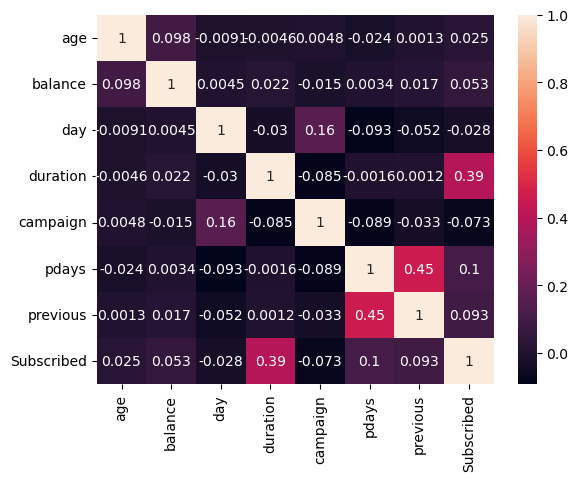

In [16]:
sns.heatmap(df_train.corr(),annot=True)

From the above heatmap, its evident that when the duration of call is more then the person subscribed the offer.


<AxesSubplot:>

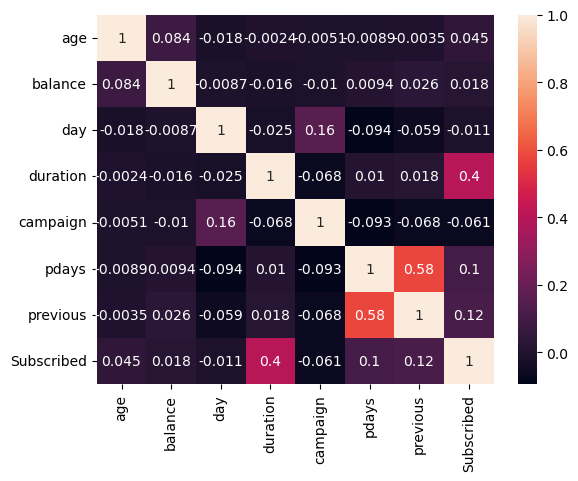

In [17]:
sns.heatmap(df_test.corr(),annot=True)

In [18]:
df_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [19]:
df_train['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

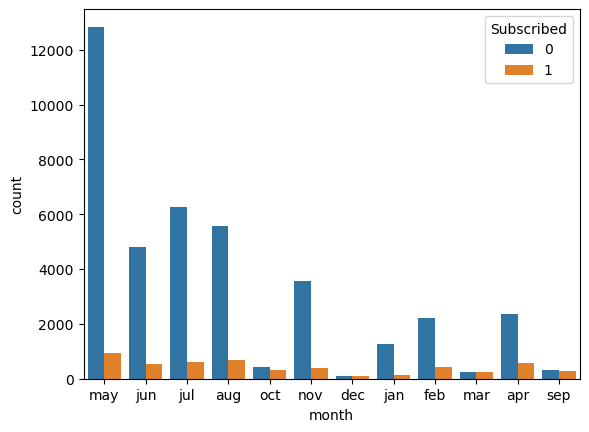

In [20]:
sns.countplot(df_train['month'],hue=df_train['Subscribed'])

In [21]:
df_train.drop('month',axis=1,inplace=True)
df_test.drop('month',axis=1,inplace=True)

In [22]:
df=pd.concat([df_train,df_test],axis=0).reset_index()

In [23]:
df

,index,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,Subscribed
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,-1,0,unknown,0
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,-1,0,unknown,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,-1,0,unknown,0
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,92,1,-1,0,unknown,0
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,4516,33,services,married,secondary,no,-333,yes,no,cellular,30,329,5,-1,0,unknown,0
49728,4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,153,1,-1,0,unknown,0
49729,4518,57,technician,married,secondary,no,295,no,no,cellular,19,151,11,-1,0,unknown,0
49730,4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,129,4,211,3,other,0


# Feature engineering

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
one_hot_encoded_marital = encoder.fit_transform( df[['marital']])
encoded_df_marital = pd.DataFrame(one_hot_encoded_marital, columns=encoder.get_feature_names_out(['marital']))
one_hot_encoded_contact = encoder.fit_transform( df[['contact']])
encoded_df_contact = pd.DataFrame(one_hot_encoded_contact, columns=encoder.get_feature_names_out(['contact']))

In [26]:
encoded_df_marital=encoded_df_marital.astype(int)
encoded_df_contact=encoded_df_contact.astype(int)

In [27]:
df=pd.concat([df,encoded_df_marital,encoded_df_contact],axis=1)

In [28]:
df.drop(['marital','contact'],axis=1,inplace=True)

In [29]:
df['job']=df['job'].map(df['job'].value_counts())

In [30]:
df

,index,age,job,education,default,balance,housing,loan,day,duration,...,pdays,previous,poutcome,Subscribed,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown
0,0,58,10427,2,0,2143,1,0,5,261,...,-1,0,3,0,0,1,0,0,0,1
1,1,44,8365,1,0,29,1,0,5,151,...,-1,0,3,0,0,0,1,0,0,1
2,2,33,1655,1,0,2,1,1,5,76,...,-1,0,3,0,0,1,0,0,0,1
3,3,47,10678,3,0,1506,1,0,5,92,...,-1,0,3,0,0,1,0,0,0,1
4,4,33,326,3,0,1,0,0,5,198,...,-1,0,3,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,4516,33,4571,1,0,-333,1,0,30,329,...,-1,0,3,0,0,1,0,1,0,0
49728,4517,57,1762,2,1,-3313,1,1,9,153,...,-1,0,3,0,0,1,0,0,0,1
49729,4518,57,8365,1,0,295,0,0,19,151,...,-1,0,3,0,0,1,0,1,0,0
49730,4519,28,10678,1,0,1137,0,0,6,129,...,211,3,1,0,0,1,0,1,0,0


<AxesSubplot:>

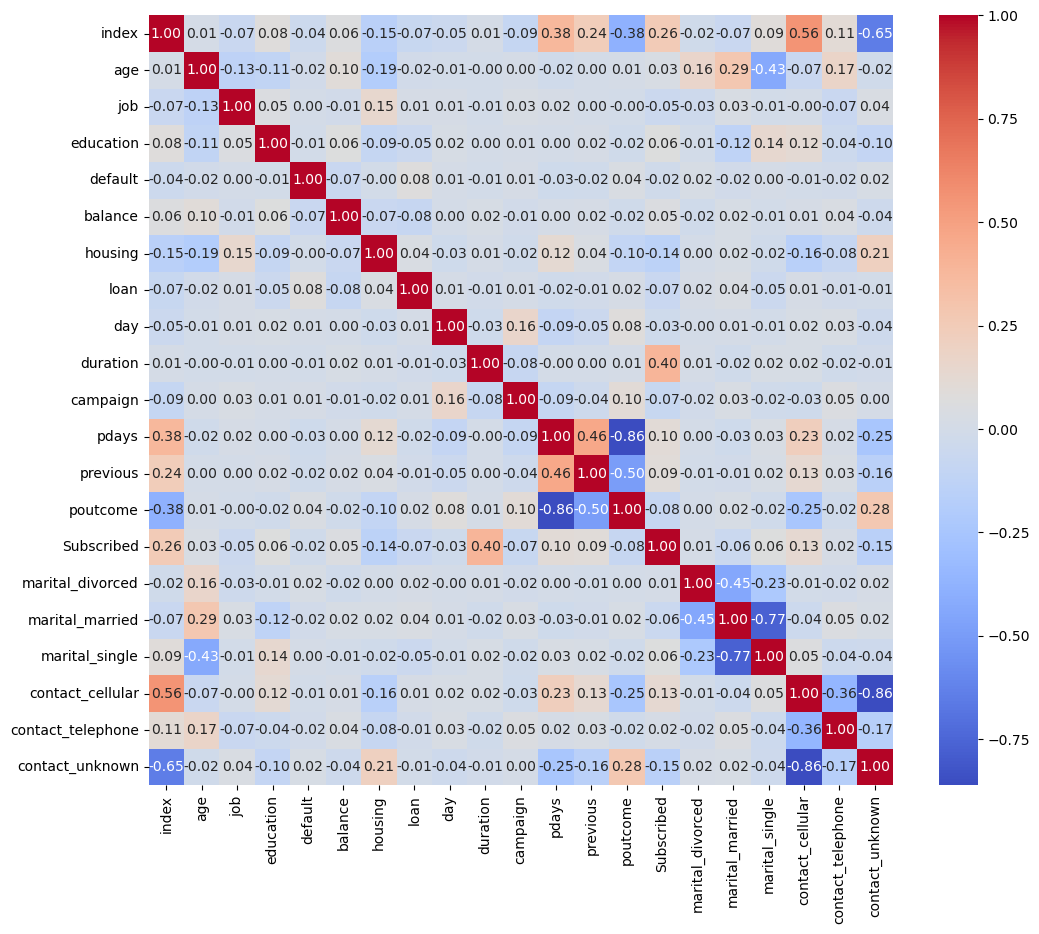

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')

# Model Training


In [32]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [33]:
x=df.drop('Subscribed',axis=1)
y=df['Subscribed']

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
nm=NearMiss(version=3)
x_undersampled,y_undersampled=nm.fit_resample(x_train,y_train)

In [36]:
smote=SMOTE(random_state=42)
x_oversampled, y_oversampled=smote.fit_resample(x_train,y_train)

In [38]:
classifier=LogisticRegression()
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [39]:
param_grid={
    'penalty':['l1','l2'],
    'C':[0.001,0.01,0.1,1,10,100],
    'solver':['liblinear'],
    'max_iter':[100,200,300]
}

In [40]:
grid_search_unsampled=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=cv,scoring='accuracy')

In [41]:
grid_search_unsampled.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [43]:
y_pred_unsampled=grid_search_unsampled.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_unsampled)

0.8980597164974364

In [45]:
grid_search_unsampled.best_params_

{'C': 10, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}

In [47]:
grid_search_undersampled=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=cv,scoring='accuracy')
grid_search_undersampled.fit(x_undersampled,y_undersampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [49]:
y_pred_undersampled=grid_search_undersampled.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred_undersampled)

0.8244696893535739

In [51]:
grid_search_undersampled.best_params_

{'C': 0.1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

In [52]:
grid_search_oversampled=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=cv,scoring='accuracy')
grid_search_oversampled.fit(x_oversampled,y_oversampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [53]:
y_pred_oversampled=grid_search_oversampled.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred_oversampled)

0.8764451593445259

# Model Evaluation

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8796
           1       0.64      0.28      0.39      1151

    accuracy                           0.90      9947
   macro avg       0.77      0.63      0.67      9947
weighted avg       0.88      0.90      0.88      9947



<AxesSubplot:>

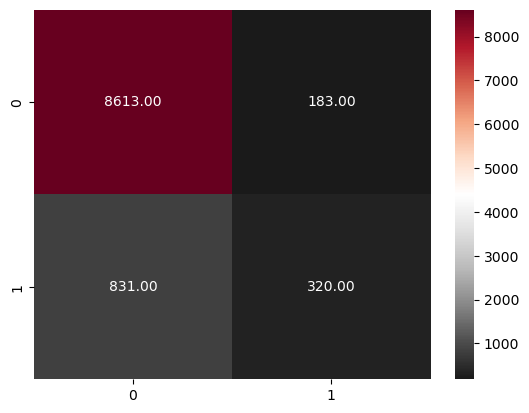

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred_unsampled))

sns.heatmap(confusion_matrix(y_test,y_pred_unsampled),cmap='RdGy_r',fmt='.2f',annot=True)